## TMA4215 - Exercise 5 ## 
*Group: Hanna Heshmati Rød, Karine Austbø Grande and Thea Boge*

#### Problem 1

\begin{align*}
    f(\bold{x}) = x_1^2 + (x_2 -8)^2 - (x_3 + 5)^2
\end{align*}


Calculating gradient of funciton

\begin{align*}
\nabla f(\bold{x}) = \nabla f(\left.x_{1}, x_{2}, x_{3}\right)=\left(\begin{array}{c}
\dfrac{\partial f}{\partial x_1}(\left.x_{1}, x_{2}, x_{3}\right)\\\\
\dfrac{\partial f}{\partial x_2}(\left.x_{1}, x_{2}, x_{3}\right) \\\\
\dfrac{\partial f}{\partial x_3}(\left.x_{1}, x_{2}, x_{3}\right) 
\end{array}\right)
= \left(\begin{array}{c} 2x_1 \\
2(x_2 -8) \\
-2(x_3 +5)
\end{array}\right)
\end{align*}

Evaluating the gradient at the initial point $\bold{x}^{(0)} = (0,0,0)^T$

\begin{align*}
\bold{g}^{(0)} = f(\bold{x}^{(0)}) = \left(\begin{array}{c} 0 \\
2(0 -8) \\
-2(0 +5)
\end{array}\right)
= \left(\begin{array}{c} 0 \\
-16\\
-10
\end{array}\right)
\end{align*}


\begin{align*}
    \alpha_0 = \argmin_{\alpha \geq 0} f(\bold{x}^{(0)} - \alpha \bold{g}^{(0)})
    = \argmin_{\alpha \geq 0} 0 + (6\alpha - 8)^2 - (10\alpha + 5)^2
    =\argmin_{\alpha \geq 0} (16\alpha - 8)^2 -(10\alpha + 5)^2
    = \argmin_{\alpha \geq 0} 156\alpha^2 - 356\alpha + 39
\end{align*}

Minimizing with respect to $\alpha$

\begin{align*}
\dfrac{\partial f}{\partial \alpha} = 312 \alpha - 356 = 0
\end{align*}

\begin{align*}
\alpha_0 = \dfrac{356}{312} = 1.141
\end{align*}

The next iterate $\bold{x}^{(1)}$ is:

\begin{align*}
\bold{x}^{(1)} = \bold{x}^{(0)} - \alpha_0\bold{g}^{(0)}
= -1.141 \left(\begin{array}{c} 0 \\
-16\\
-10
\end{array}\right)
= \left(\begin{array}{c} 0 \\
18.256\\
11.41
\end{array}\right)
\end{align*}


\begin{align*}
\bold{g}^{(1)} = f(\bold{x}^{(1)}) = \left(\begin{array}{c} 0 \\
2(18.256 -8) \\
-2(11.41 +5)
\end{array}\right)
= \left(\begin{array}{c} 0 \\
20.512\\
-32.82
\end{array}\right)
\end{align*}

\begin{align*}
    \alpha_1 = \argmin_{\alpha \geq 0} f(\bold{x}^{(1)} - \alpha \bold{g}^{(1)})
    = \argmin_{\alpha \geq 0} 0 + (18.256  - 20.512 \alpha - 8)^2 - (11.41 + 32.82 \alpha + 5)^2
    = \argmin_{\alpha \geq 0} -656 \alpha^2 - 1495.68 \alpha - 164.1024
\end{align*}

Minimizing with respect to $\alpha$

\begin{align*}

\dfrac{\partial f}{\partial \alpha} = -1312 \alpha - 1495.68 = 0

\end{align*}
Solving for $\alpha$
\begin{align*}
\alpha_1 = \dfrac{1495.68}{-1312} = -1.14
\end{align*}

The next iterate $\bold{x}^{21)}$ is:

\begin{align*}
\bold{x}^{(2)} = \bold{x}^{(1)} - \alpha_1\bold{g}^{(1)}
=\left(\begin{array}{c} 0 \\
18.256\\
11.41
\end{array}\right)
+ 1.14 \left(\begin{array}{c} 0 \\
20.512\\
-32.82
\end{array}\right)
= \left(\begin{array}{c} 0 \\
41.6387\\
-26.0048
\end{array}\right)
\end{align*}

#### Problem 2
We will now compare the following methods for the Rosenbrock function $\mathbb{f} : \mathbb{R}^2 \to \mathbb{R}$ 
$$\mathbb{f}(\bold{x}) = \mathbb{f}(x_1, x_2) = 100(x_2 - x_1^2)^2 + (1-x_1)^2 $$

* `steepest_descent(f, gradf, x0, a0, c, s, tol, maxiter)`

* `conjugategradient(f, gradf, x0, a0, c, s, tol, maxiter)`

* `newton(f, gradf, hessf, x0, a0, c, s, tol, maxiter)`


In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
def rosenbrock(x):
    x1, x2 = x
    return 100 * (x2 - x1**2)**2 + (1-x1)**2

def rosenbrock_gradient(x):
    x1, x2 = x
    dfdx1 = -400 * x1 + (x2 - x1**2) - 2 * (1 - x1)
    dfdx2 = 200 * (x2 - x1**2)
    return np.array([dfdx1, dfdx2])

def rosenbrock_hessian(x):
    x1, x2 = x
    d2fdx1 = 1200 * x1**2 - 400 * x2 + 2
    d2fdx2 = 200
    d2fdx1x2 = -400 * x1
    return np.array([[d2fdx1, d2fdx1x2], [d2fdx1x2, d2fdx2]])

In [64]:
def steepest_descent(f, gradf, x0, a0=1, c=0.5, s=1e-2, tol=1e-4, maxiter=1000):
    xk = x0
    iterates = [xk]
    num_iterations = 0
    
    for _ in range(maxiter):
        grad = gradf(xk)
        grad_norm = np.linalg.norm(grad)
        
        if grad_norm <= tol:
            break
        
        alpha = a0
        while f(xk - alpha * grad) > f(xk) - c * alpha * grad_norm**2:
            alpha *= s
        
        xk = xk - alpha * grad
        iterates.append(xk)
        num_iterations += 1
    
    return np.array(iterates), num_iterations

In [65]:
def conjugate_gradient(f, gradf, x0, a0=1, c=0.5, s=1e-2, tol=1e-4, maxiter=10000):
    xk = x0
    iterates = [xk]
    num_iterations = 0
    grad = gradf(xk)
    pk = -grad
    
    for _ in range(maxiter):
        if np.linalg.norm(grad) <= tol:
            break

        alpha = a0
        while f(xk + alpha * pk) > f(xk) + c * alpha * np.dot(grad, pk):
            alpha *= s
            
        xk = xk + alpha * pk
        iterates.append(xk)
        
        grad_new = gradf(xk)
        beta = np.dot(grad_new, grad_new) / np.dot(grad, grad)
        pk = -grad_new + beta * pk
        grad = grad_new
        num_iterations += 1
    
    return np.array(iterates), num_iterations

In [66]:
def newton(f, gradf, hessf, x0, a0=1, c=0.5, s=1e-2, tol=1e-4, maxiter=10000):
    xk = x0
    iterates = [xk]
    num_iterations = 0
    
    for _ in range(maxiter):
        grad = gradf(xk)
        if np.linalg.norm(grad) <= tol:
            break
        
        hess = hessf(xk)
        pk = -np.linalg.solve(hess, grad)
        
        alpha = a0
        while f(xk + alpha * pk) > f(xk) + c * alpha * np.dot(grad, pk):
            alpha *= s
        xk = xk + alpha * pk
        iterates.append(xk)
        num_iterations += 1
    
    return np.array(iterates), num_iterations

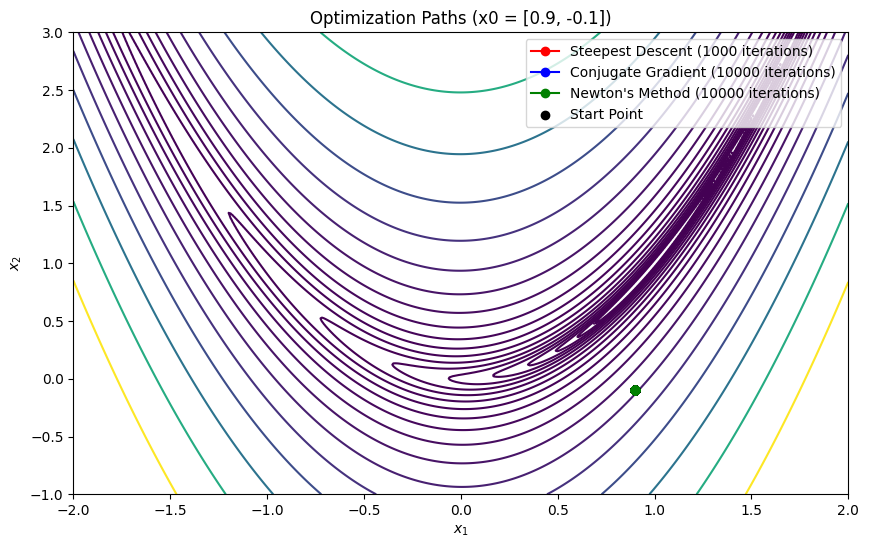

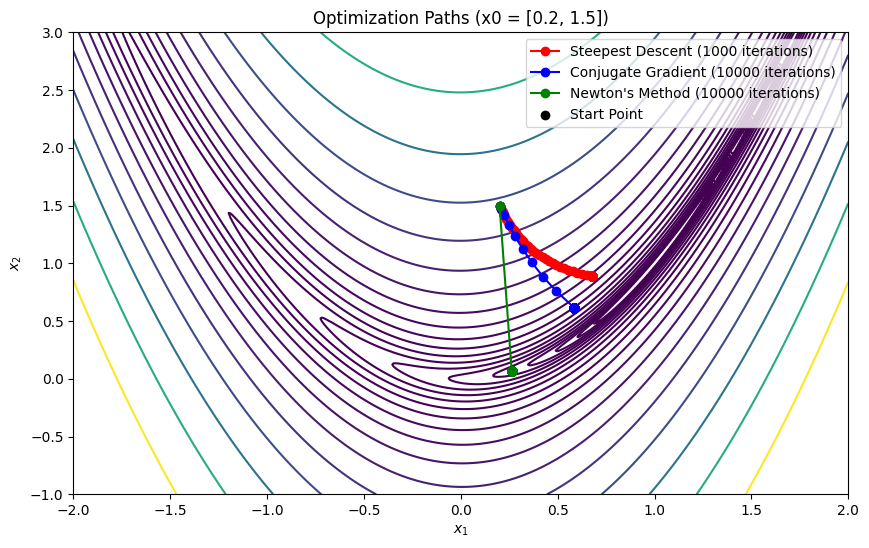

In [67]:
# Parameters
x0_1 = np.array([0.9, -0.1])
x0_2 = np.array([0.2, 1.5])

# Run optimization methods for first initial point
steepest_path_1, iter_steep_1 = steepest_descent(rosenbrock, rosenbrock_gradient, x0_1)
conjugate_path_1, iter_conj_1 = conjugate_gradient(rosenbrock, rosenbrock_gradient, x0_1)
newton_path_1, iter_newt_1 = newton(rosenbrock, rosenbrock_gradient, rosenbrock_hessian, x0_1)

# Define the plotting function, with additional parameters for iteration counts
def plot_paths(paths, x0, title, iter_steep, iter_conj, iter_newt):
    x1_vals = np.linspace(-2, 2, 400)
    x2_vals = np.linspace(-1, 3, 400)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    Z = rosenbrock([X1, X2])

    plt.figure(figsize=(10, 6))
    plt.contour(X1, X2, Z, levels=np.logspace(-1, 3, 20), cmap="viridis")
    plt.plot(*zip(*paths[0]), marker="o", color="r", label=f"Steepest Descent ({iter_steep} iterations)")
    plt.plot(*zip(*paths[1]), marker="o", color="b", label=f"Conjugate Gradient ({iter_conj} iterations)")
    plt.plot(*zip(*paths[2]), marker="o", color="g", label=f"Newton's Method ({iter_newt} iterations)")
    plt.scatter(*x0, color="black", label="Start Point")
    plt.title(title)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.legend()
    plt.show()

# Plot for x0 = [0.9, -0.1]
plot_paths([steepest_path_1, conjugate_path_1, newton_path_1], x0_1, 
           "Optimization Paths (x0 = [0.9, -0.1])", iter_steep_1, iter_conj_1, iter_newt_1)

# Run optimization methods for the second initial point
steepest_path_2, iter_steep_2 = steepest_descent(rosenbrock, rosenbrock_gradient, x0_2)
conjugate_path_2, iter_conj_2 = conjugate_gradient(rosenbrock, rosenbrock_gradient, x0_2)
newton_path_2, iter_newt_2 = newton(rosenbrock, rosenbrock_gradient, rosenbrock_hessian, x0_2)

# Plot for x0 = [0.2, 1.5]
plot_paths([steepest_path_2, conjugate_path_2, newton_path_2], x0_2, 
           "Optimization Paths (x0 = [0.2, 1.5])", iter_steep_2, iter_conj_2, iter_newt_2)